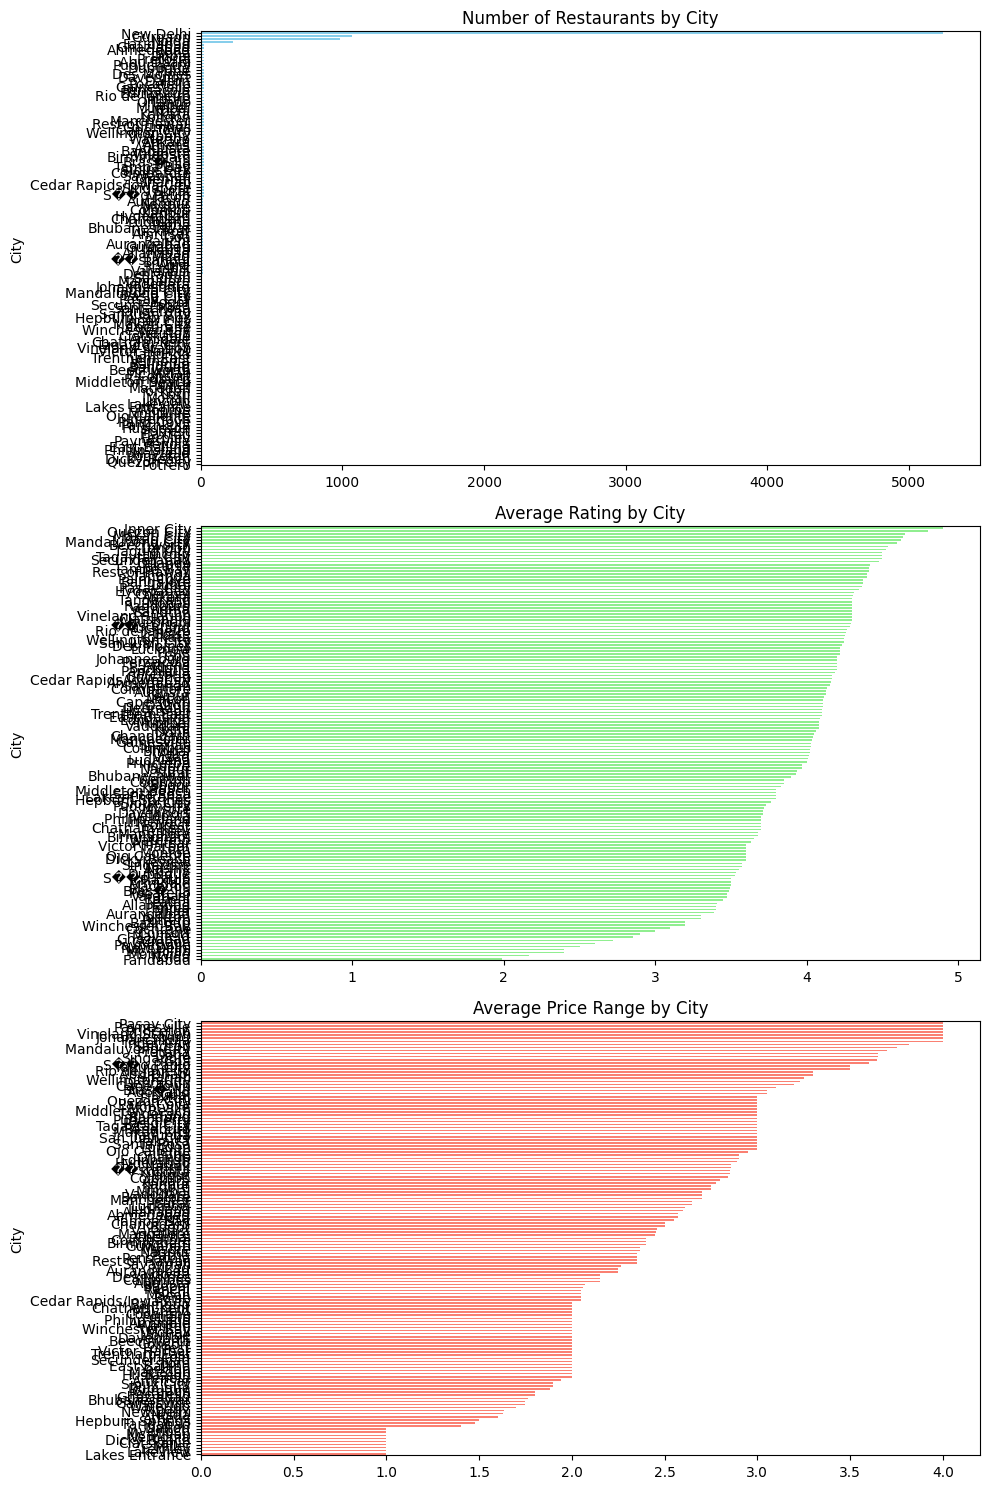

In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset.csv'  # Adjust this path to where your dataset is stored
data = pd.read_csv(file_path)

# Handling missing values for 'Latitude' and 'Longitude'
data = data[data['Latitude'] != 0]
data = data[data['Longitude'] != 0]

# Create a map centered around an average location
average_latitude = data['Latitude'].mean()
average_longitude = data['Longitude'].mean()
restaurant_map = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Adding a marker cluster to the map
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Adding each restaurant to the marker cluster
for idx, row in data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['Restaurant Name']}, Rating: {row['Aggregate rating']}",
                  icon=folium.Icon(color='red', icon='info-sign')).add_to(marker_cluster)

# Display the map
restaurant_map.save('restaurant_distribution.html')

# Grouping by city and analyzing restaurant concentration
city_stats = data.groupby('City').agg({'Restaurant Name': 'count',
                                       'Aggregate rating': 'mean',
                                       'Price range': 'mean'}).rename(columns={'Restaurant Name': 'Count'})

# Plotting the statistics
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

city_stats['Count'].sort_values().plot(kind='barh', ax=ax[0], color='skyblue')
ax[0].set_title('Number of Restaurants by City')

city_stats['Aggregate rating'].sort_values().plot(kind='barh', ax=ax[1], color='lightgreen')
ax[1].set_title('Average Rating by City')

city_stats['Price range'].sort_values().plot(kind='barh', ax=ax[2], color='salmon')
ax[2].set_title('Average Price Range by City')

plt.tight_layout()
plt.savefig('city_stats.png')
plt.show()
